In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrowPatch
import pandas as pd
import warnings
import networkx as nx
import random
warnings.filterwarnings("ignore")

from parameters import *
from global_vars import *
from agent import *
from setup import *
from go import *
from MODEL import *
from visualize import *

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [4]:
# # TEST SETUP
# my_seed = random.randint(0,1000000)
# mymodel = model(my_seed)
# mymodel.par.n_players = 5
# mymodel.par.n_connections = 2

# setup(mymodel.par, mymodel.gv, mymodel.al)

# for a in mymodel.al.agents_list:
#     print(a.who, [a.who for a in a.neighbors])

# for a in mymodel.al.agents_list:
#     print("\n" + "*"*100 + "\n")
#     print(a.strategy)

In [2]:
#test if the model is running
my_seed = random.randint(0,1000000)
print("Seed: ", my_seed)
mymodel = model(my_seed)
mymodel.par.init_brown = 2000
mymodel.par.max_brown = mymodel.par.init_brown
mymodel.par.init_black = 5
mymodel.par.init_green = 5
mymodel.par.init_red = 0
mymodel.par.length_forecast = 8
mymodel.par.max_blocks = 200
mymodel.par.n_players = 10
mymodel.par.max_turn = 30
mymodel.par.n_connections = 4
mymodel.run(my_seed)

print(mymodel.gv.turn, mymodel.gv.brown, len(mymodel.al.agents_list))

Seed:  129577
30 666 10


In [3]:
plot_ts_all_decisions(mymodel)

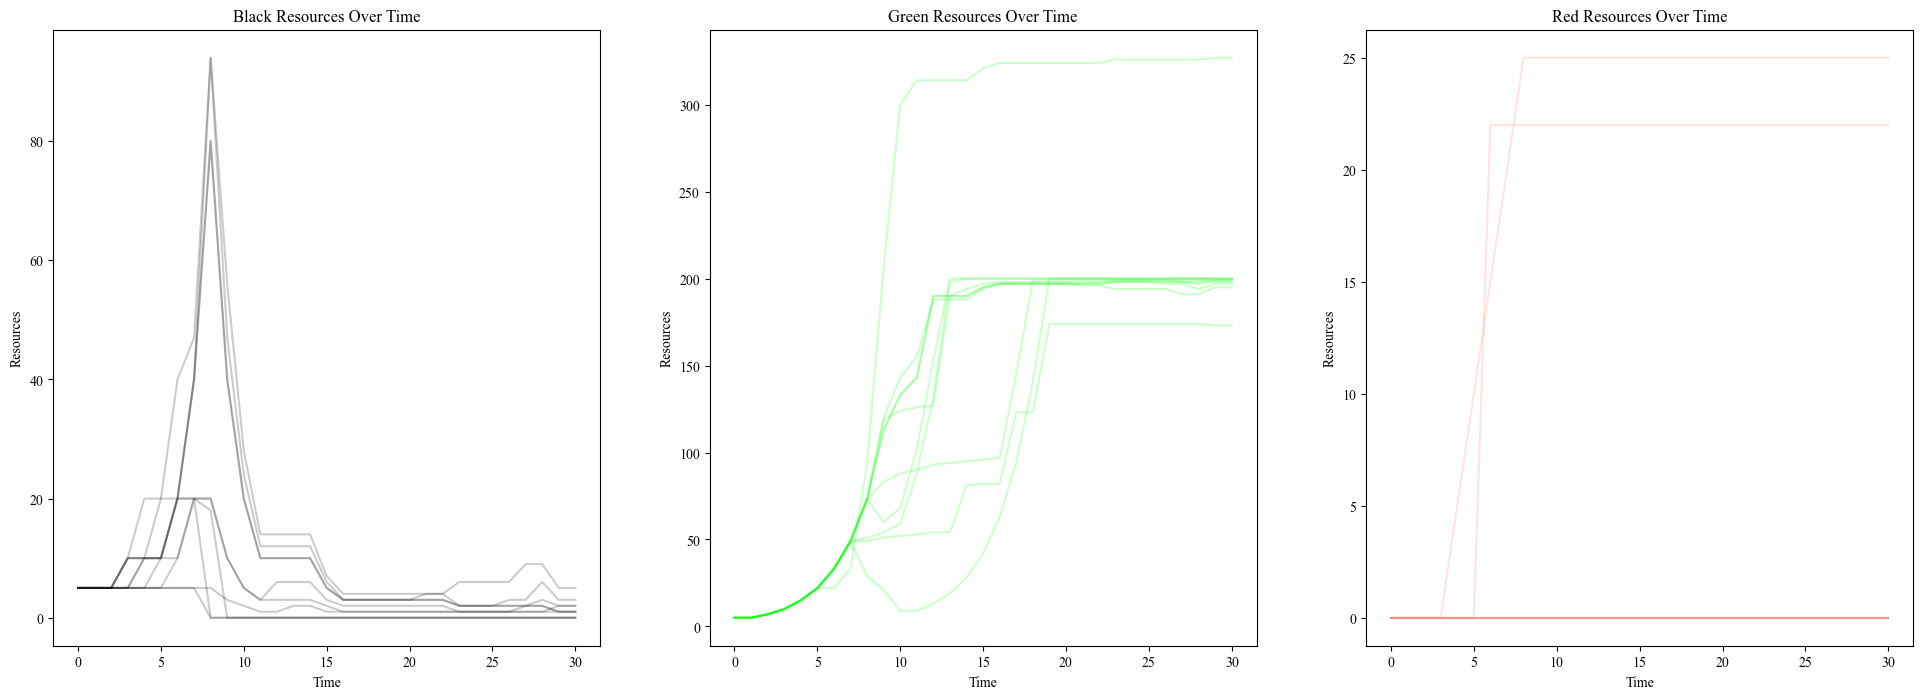

In [4]:
def plot_individual_ts(mymodel):
    """
    Plot the time series of individual agents' brown and black resources.
    """
    fig, ax = plt.subplots(1, 3, figsize=(24, 8), sharex=True)
    for agent in mymodel.al.original_list:
        ax[0].plot(agent.ts_black, color='black', alpha=0.2)
        ax[1].plot(agent.ts_green, color='lime', alpha=0.2)
        ax[2].plot(agent.ts_red, color='salmon', alpha=0.2)
    
    ax[0].set_title('Black Resources Over Time')
    ax[1].set_title('Green Resources Over Time')
    ax[2].set_title('Red Resources Over Time')
    ax[0].set_ylabel('Resources')
    ax[1].set_ylabel('Resources')
    ax[2].set_ylabel('Resources')

    ax[0].set_xlabel('Time')
    ax[1].set_xlabel('Time')
    ax[2].set_xlabel('Time')
    plt.show()

plot_individual_ts(mymodel)

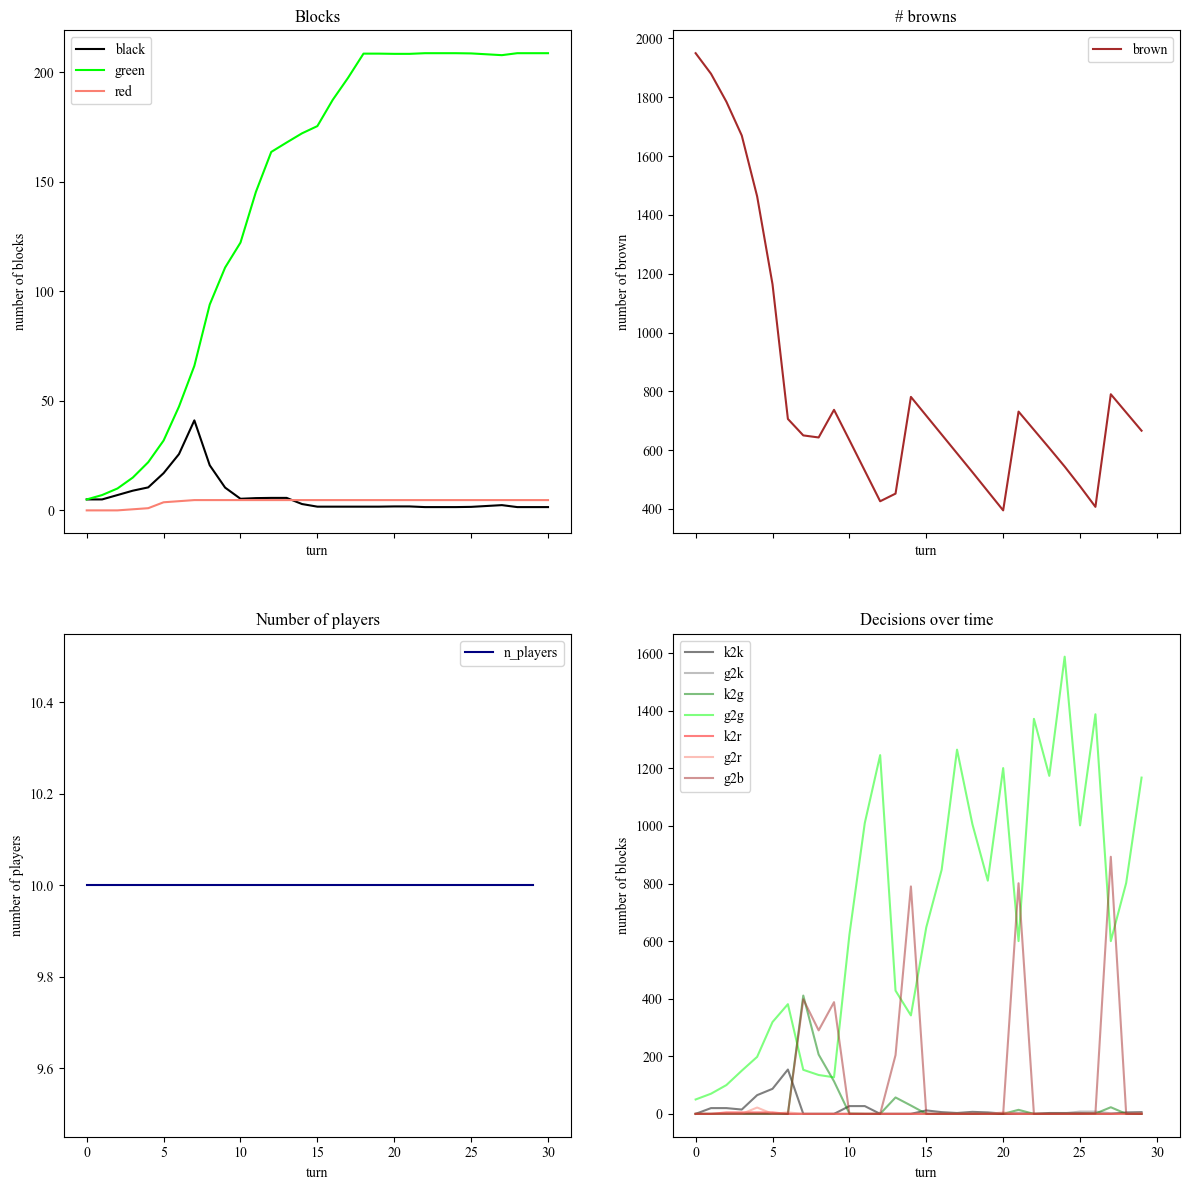

In [5]:
def plot_ts_all(mod):

    fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

    plt.subplot(2,2,1)
    plt.plot(mod.gv.ts_black, label='black', color='black')
    plt.plot(mod.gv.ts_green, label='green', color='lime')
    plt.plot(mod.gv.ts_red, label='red', color='salmon')
    plt.title('Blocks')
    plt.xlabel('turn')
    plt.ylabel('number of blocks')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(mod.gv.brown_ts, label='brown', color='brown')
    plt.title('# browns')
    plt.xlabel('turn')
    plt.ylabel('number of brown')
    plt.legend()

    plt.subplot(2,2,3)
    plt.plot(mod.gv.n_players_ts, label='n_players', color='navy')
    plt.title('Number of players')
    plt.xlabel('turn')
    plt.ylabel('number of players')
    plt.legend()

    plt.subplot(2,2,4)
    decisions_ts = []

    for t in range(mymodel.gv.turn):
        new_decisions = [0] * 7
        for ag in mymodel.al.original_list:
            if len(ag.ts_decisions_production) < t + 1: continue
            decision_turn_t = ag.ts_decisions_production[t]
            for d in decision_turn_t:
                new_decisions[d[0]] += d[1]
        decisions_ts.append(new_decisions)

    dec1, dec2, dec3, dec4, dec5, dec6, dec7 = [], [], [], [], [], [], []
    for d in decisions_ts:
        dec1.append(d[0])
        dec2.append(d[1])
        dec3.append(d[2])
        dec4.append(d[3])
        dec5.append(d[4])
        dec6.append(d[5])
        dec7.append(d[6])

    plt.plot(dec1, label='k2k', color='black', alpha = 0.5)
    plt.plot(dec2, label='g2k', color='grey', alpha = 0.5)
    plt.plot(dec3, label='k2g', color='green', alpha = 0.5)
    plt.plot(dec4, label='g2g', color='lime', alpha = 0.5)
    plt.plot(dec5, label='k2r', color='red', alpha = 0.5)
    plt.plot(dec6, label='g2r', color='salmon', alpha = 0.5)
    plt.plot(dec7, label='g2b', color='brown', alpha = 0.5)

    plt.legend()
    plt.title('Decisions over time')
    plt.xlabel('turn')
    plt.ylabel('number of blocks')
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

plot_ts_all(mymodel)

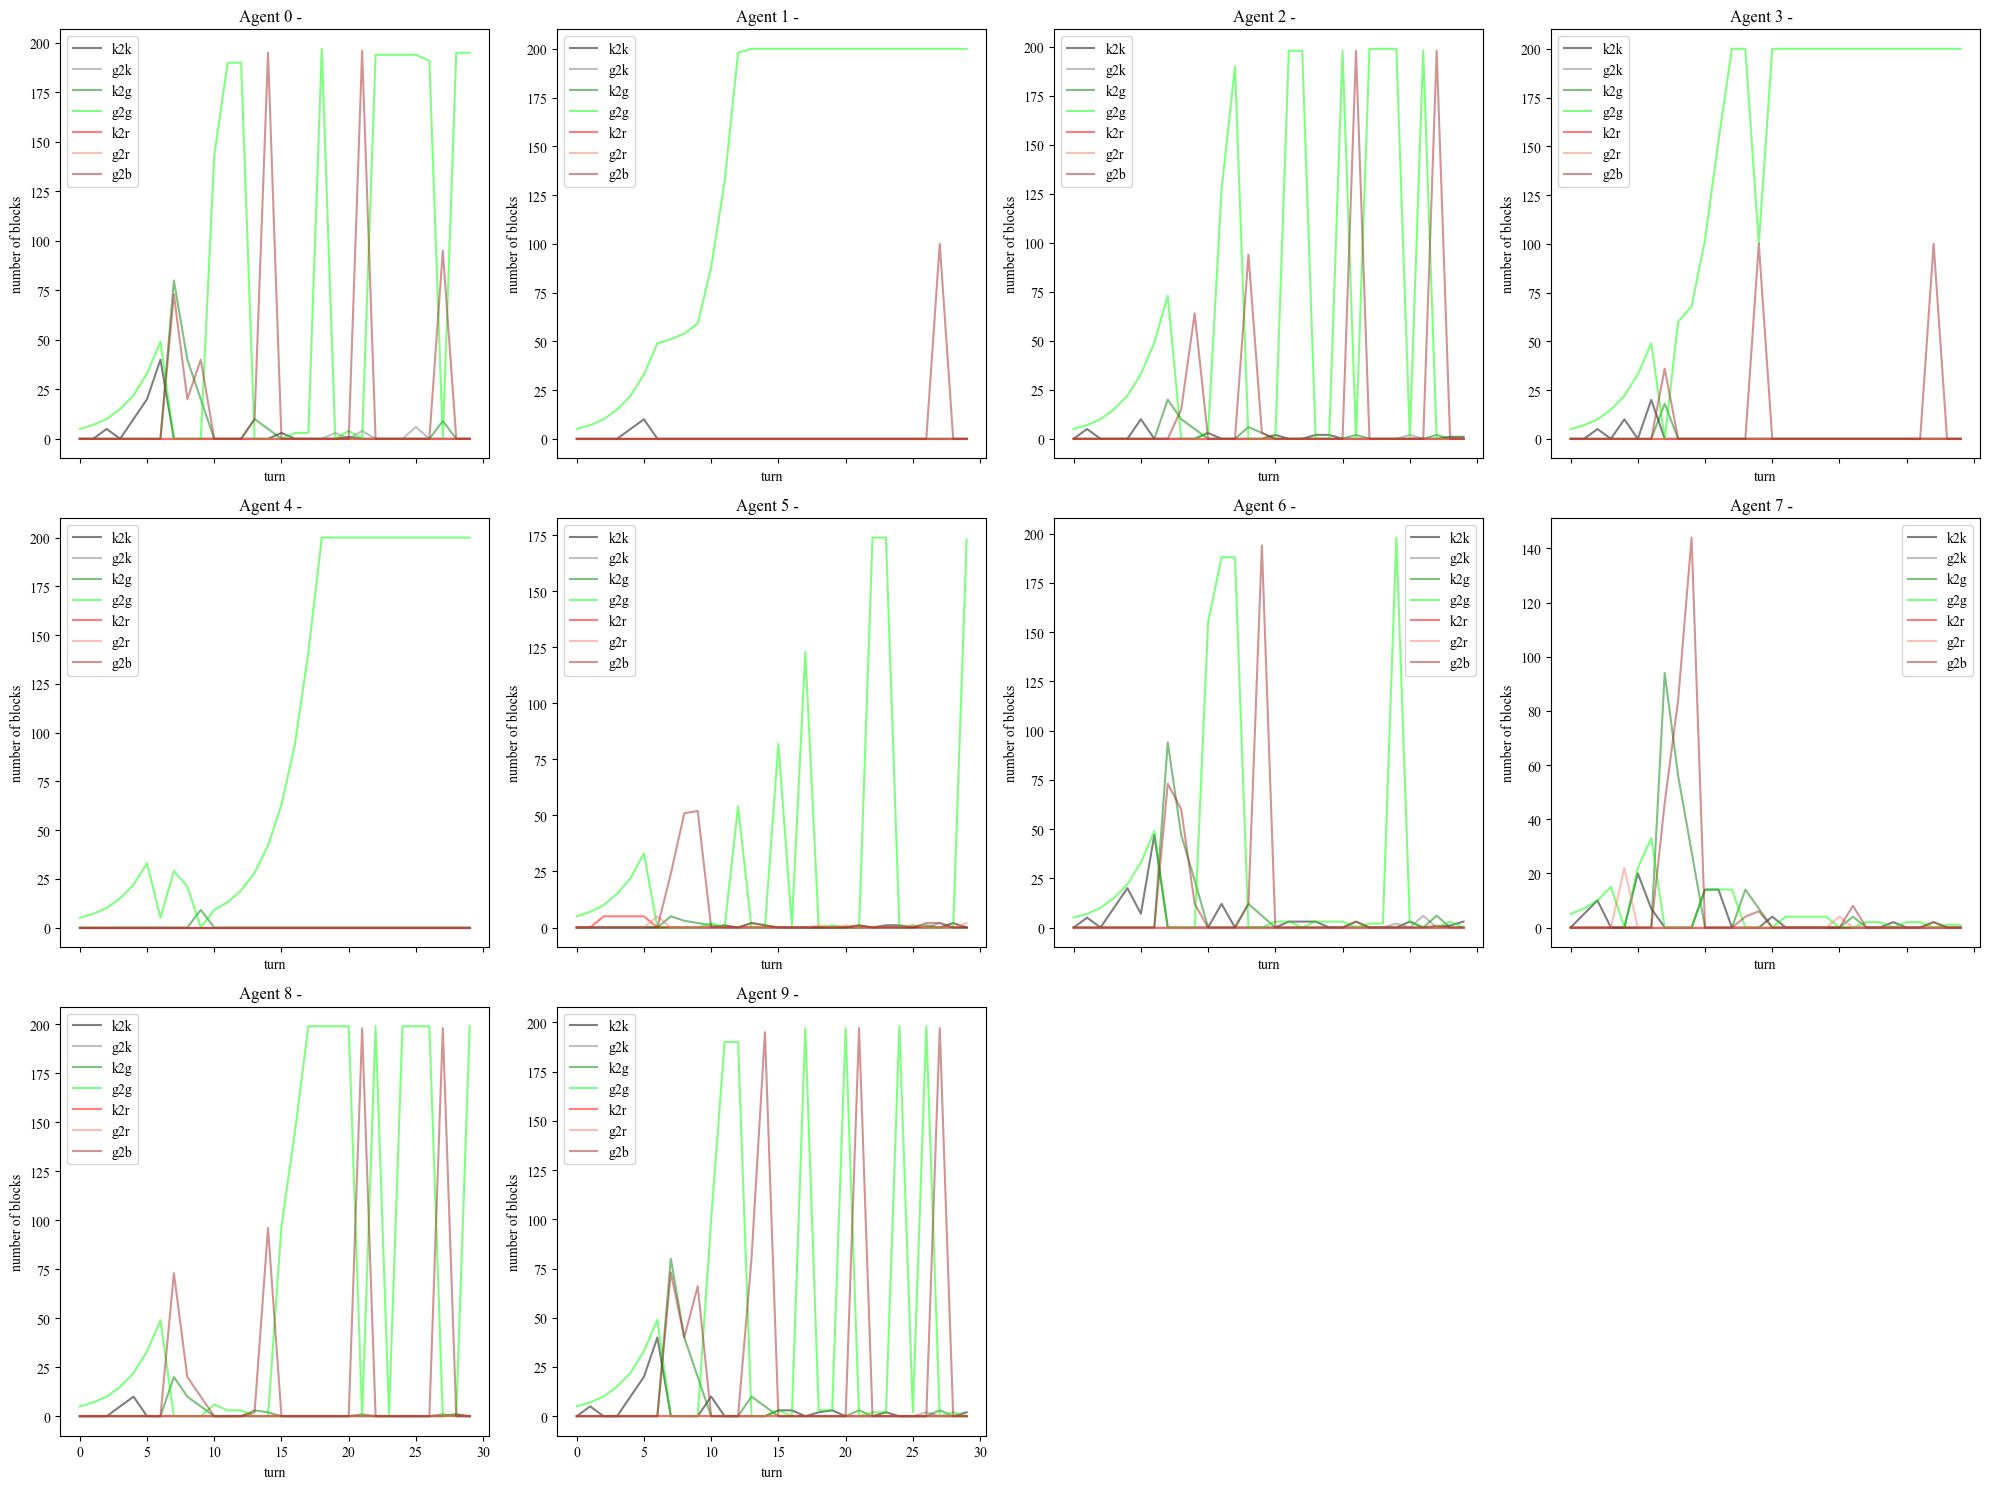

In [6]:
def plot_ts_all_decisions(mod):

    n = mod.par.n_players

    # create a figure with subplots grid with 4 columns and the right number of rows 
    n_cols = 4
    n_rows = int(np.ceil(n / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)
    axs = axs.flatten()  # flatten the 2D array of axes to 1D for easier indexing
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # adjust space between subplots

    for i, agent in enumerate(mod.al.original_list):
        ax = axs[i]
        ax.set_title(f'Agent {agent.who} - {agent.strategy_name}')
        ax.set_xlabel('turn')
        ax.set_ylabel('number of blocks')

        # plot the decisions for this agent
        decisions_ts = []
        for t in range(len(agent.ts_decisions_production)):
            new_decisions = [0] * 7
            #if len(agent.ts_decisions_production) < t + 1: continue
            decision_turn_t = agent.ts_decisions_production[t]
            for d in decision_turn_t:
                new_decisions[d[0]] += d[1]
            decisions_ts.append(new_decisions)

        dec1, dec2, dec3, dec4, dec5, dec6, dec7 = [], [], [], [], [], [], []
        for d in decisions_ts:
            dec1.append(d[0])
            dec2.append(d[1])
            dec3.append(d[2])
            dec4.append(d[3])
            dec5.append(d[4])
            dec6.append(d[5])
            dec7.append(d[6])

        ax.plot(dec1, label='k2k', color='black', alpha=0.5)
        ax.plot(dec2, label='g2k', color='grey', alpha=0.5)
        ax.plot(dec3, label='k2g', color='green', alpha=0.5)
        ax.plot(dec4, label='g2g', color='lime', alpha=0.5)
        ax.plot(dec5, label='k2r', color='red', alpha=0.5)
        ax.plot(dec6, label='g2r', color='salmon', alpha=0.5)
        ax.plot(dec7, label='g2b', color='brown', alpha=0.5)

        ax.legend()
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

plot_ts_all_decisions(mymodel)




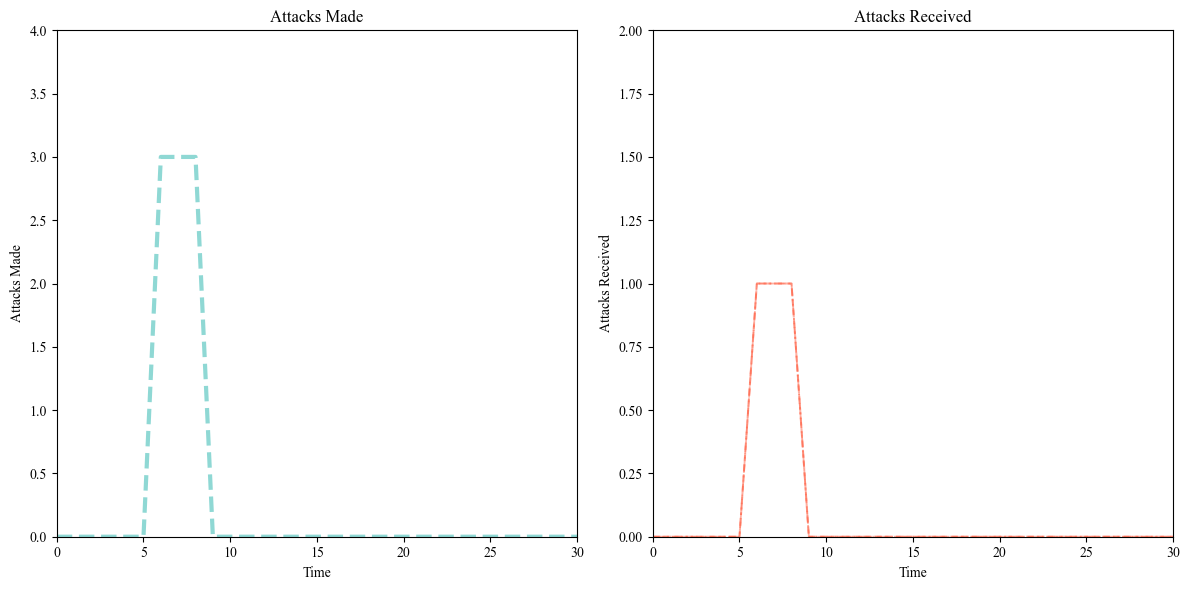

In [7]:
def plot_attacks(mod):

    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
    max_attack_made, max_attack_received = 0, 0

    for ag in mod.al.original_list:

        attacks_made_time = [a['turn'] for a in ag.ts_attacks_made]
        attacks_made_entity = [a['self_red'] for a in ag.ts_attacks_made]
        attacks_made_count = [1 for a in ag.ts_attacks_made]

        # check if there is repetition of time in the attacks made, if so, sum the counts
        attacks_made_count = pd.Series(attacks_made_count).groupby(attacks_made_time).sum().tolist()
        attack_made_time_new = pd.Series(attacks_made_time).groupby(attacks_made_time).first().tolist()

        attack_time_final, attack_made_count_final = [], []
        if len(attack_made_time_new) > 0:
            for t in range(len(ag.ts_black)):
                attack_time_final.append(t)
                if t in attack_made_time_new:
                    attack_made_count_final.append(attacks_made_count[attack_made_time_new.index(t)])
                else:
                    attack_made_count_final.append(0)
            
            max_attack_made = max(max_attack_made, max(attack_made_count_final))
        else:
            attack_time_final = [0] * (len(ag.ts_black))
            attack_made_count_final = [0] * (len(ag.ts_black))

        attacks_received_time = [a['turn'] for a in ag.ts_attacks_received]
        attacks_received_entity = [a['self_red'] for a in ag.ts_attacks_received]
        attacks_received_count = [1 for a in ag.ts_attacks_received]

        # check if there is repetition of time in the attacks received, if so, sum the counts
        attacks_received_count = pd.Series(attacks_received_count).groupby(attacks_received_time).sum().tolist()
        attack_received_time_new = pd.Series(attacks_received_time).groupby(attacks_received_time).first().tolist()

        attack_received_time_final, attack_received_count_final = [], []
        if len(attack_received_time_new) > 0:
            for t in range(len(ag.ts_black)):
                attack_received_time_final.append(t)
                if t in attack_received_time_new:
                    attack_received_count_final.append(attacks_received_count[attack_received_time_new.index(t)])
                else:
                    attack_received_count_final.append(0)
        else:
            attack_received_time_final = [0] * len(ag.ts_black)
            attack_received_count_final = [0] * len(ag.ts_black)
        
        max_attack_received = max(max_attack_received, max(attack_received_count_final))

        #print(ag.who, ag in mod.al.agents_list, attack_time_final, attack_made_count_final, attack_received_time_final, attack_received_count_final)

        if ag in mod.al.agents_list: 
            color_made = 'lightseagreen'
            color_received = 'tomato'
            alpha = 0.5
            linewidth = np.random.normal(2, 0.5)
            linestyle = random.choice(['--', '-.'])
            marker = ''
        else:
            color_made = 'lightseagreen'
            color_received = 'salmon'
            alpha = 0.2
            linewidth = np.random.normal(1, 0.2)
            linestyle = '-'
            marker = random.choice(['o', 's', '^'])

        ax[0].plot(attack_time_final, attack_made_count_final, color=color_made, alpha=alpha, linewidth=linewidth, linestyle=linestyle, marker=marker)
        ax[1].plot(attack_received_time_final, attack_received_count_final, color=color_received, alpha=alpha, linewidth=linewidth, linestyle=linestyle, marker=marker)

        
    ax[0].set_title('Attacks Made')
    ax[1].set_title('Attacks Received')
    ax[0].set_ylabel('Attacks Made')
    ax[1].set_ylabel('Attacks Received')
    ax[0].set_xlabel('Time')
    ax[1].set_xlabel('Time')
    ax[0].set_xlim(0, mymodel.gv.turn)
    ax[1].set_xlim(0, mymodel.gv.turn)
    ax[0].set_ylim(0, max_attack_made + 1)
    ax[1].set_ylim(0, max_attack_received + 1)

    plt.tight_layout()
    plt.show()
plot_attacks(mymodel)
